<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/09_02_Hex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hex Game

In [11]:
class DisjointSet:
  def __init__(self, n):
    self.S = [-1]*n

  def find(self, x):
    if self.S[x] < 0:
      return x
    p = self.find(self.S[x])
    self.S[x] = p
    return p

  def union(self, x, y):
    Xr = self.find(x)
    Yr = self.find(y)
    if Xr != Yr:
      if self.S[Xr] < self.S[Yr]:
        self.S[Xr] += self.S[Yr]
        self.S[Yr] = Xr
      else:
        self.S[Yr] += self.S[Xr]
        self.S[Xr] = Yr

  def isSameSet(self, x, y):
    return self.find(x) == self.find(y)

In [12]:
import graphviz as gv

def show(ds):
  s = ds.S
  n = len(s)
  G = gv.Digraph("merry")
  G.graph_attr["rankdir"] = "BT"
  for u in range(n):
    G.node(str(u))
  for u, parent in enumerate(s):
    if parent >= 0:
      G.edge(str(u), str(parent))
  return G

In [14]:
import numpy as np

n = 4
BLACK = 1
WHITE = 2
EMPTY = 0

board = np.zeros((n, n))

dsblacks = DisjointSet(n*n + 2)
idx = (n-1)*n
for i in range(n):
  dsblacks.union(i, n*n)
  dsblacks.union(idx, n*n + 1)
  idx += 1

dswhites = DisjointSet(n*n + 2)
for i in range(n):
  dswhites.union(i*n, n*n)
  dswhites.union((i+1)*n -1, n*n + 1)

# 2 nodos extra: sugerencia de Nicole Price

In [15]:
print(board)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


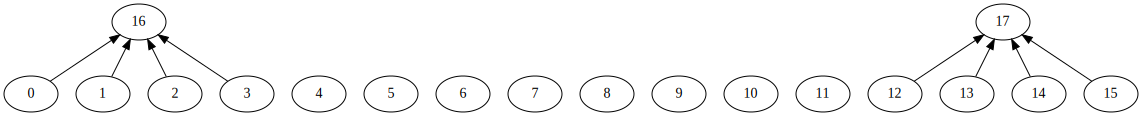

In [16]:
show(dsblacks)

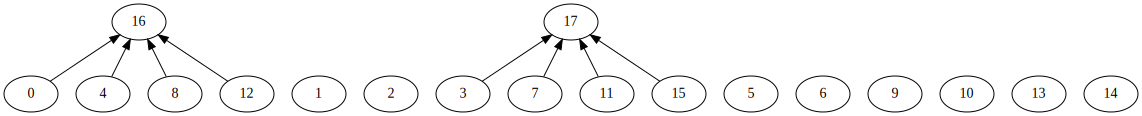

In [18]:
show(dswhites)

In [21]:
def check(i, j, i0, j0, ds):
  if i < 0 or i >=n or j < 0 or j >= n:
    return

  if board[i, j] == board[i0, j0]:
    idx = i*n + j
    idx0 = i0*n + j0
    ds.union(idx, idx0)

In [19]:
def move(i, j, piece):
  if board[i, j] != EMPTY:
    return False

  board[i, j] = piece
  ds = dsblacks if piece == BLACK else dswhites
  check(i-1, j-1, i, j, ds)
  check(i-1, j, i, j, ds)
  check(i, j-1, i, j, ds)
  check(i, j+1, i, j, ds)
  check(i+1, j, i, j, ds)
  check(i+1, j+1, i, j, ds)

  return True

In [22]:
def winner():
  if dsblacks.isSameSet(n*n, n*n+1):
    return BLACK
  elif dswhites.isSameSet(n*n, n*n+1):
    return WHITE
  return EMPTY

[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


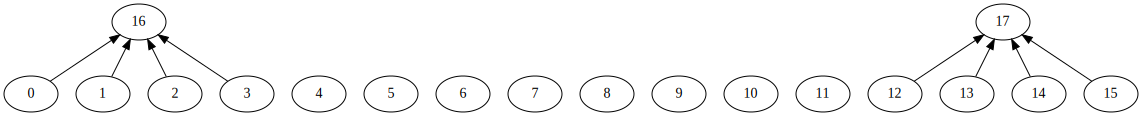

In [23]:
move(0, 0, BLACK)
print(board)
show(dsblacks)

[[1. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


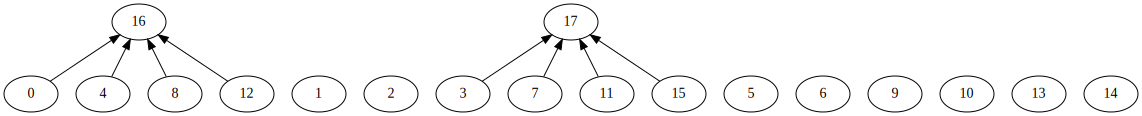

In [24]:
move(1, 2, WHITE)
print(board)
show(dswhites)

[[1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


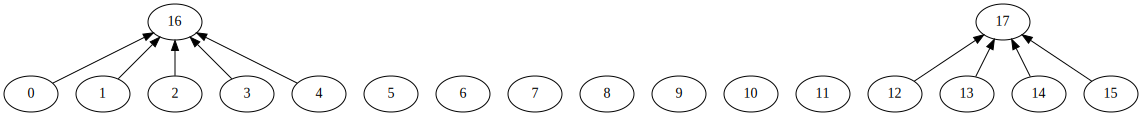

In [25]:
move(1, 0, BLACK)
print(board)
show(dsblacks)

[[1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]]


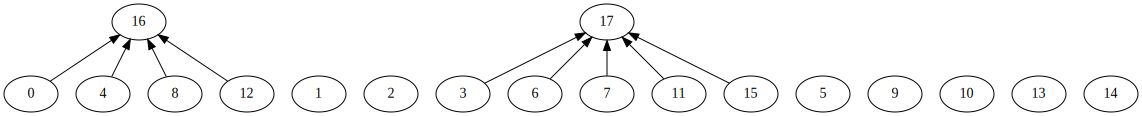

In [26]:
move(2, 3, WHITE)
print(board)
show(dswhites)

In [27]:
winner()

0

[[1. 0. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 2.]
 [0. 0. 0. 0.]]


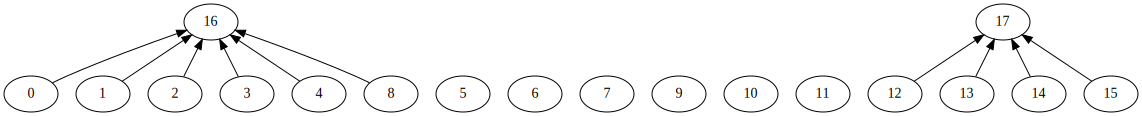

In [28]:
move(2, 0, BLACK)
print(board)
show(dsblacks)

[[1. 2. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 2.]
 [0. 0. 0. 0.]]


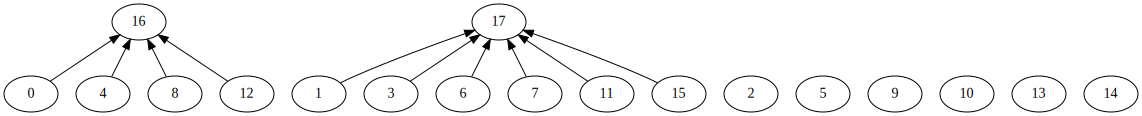

In [29]:
move(0, 1, WHITE)
print(board)
show(dswhites)

[[1. 2. 0. 0.]
 [1. 0. 2. 0.]
 [1. 0. 0. 2.]
 [1. 0. 0. 0.]]


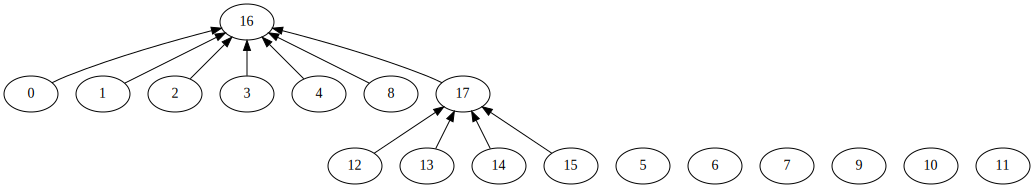

In [30]:
move(3, 0, BLACK)
print(board)
show(dsblacks)

In [31]:
winner()

1